# Pymaceuticals Inc.
---

### Analysis



-Ramicane appears to exert the most significant influence when comparing the final tumor volumes of Capomulin, Ramicane, Infubinol, and Ceftamin.

-The correlation between mouse weight and the average final tumor volume (at that weight) is notably strong for Capomulin.

-Among the top four regimens, Infubinol was the sole regimen that exhibited potential outliers.

-Based on the data, it can be inferred that Ramicane is the most effective treatment, closely followed by Capomulin.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for i,x in enumerate(combined.duplicated(subset=['Mouse ID',"Timepoint"])):
    if x==True:
        print(combined.iloc[i,0:2])

Mouse ID     g989
Timepoint       0
Name: 137, dtype: object
Mouse ID     g989
Timepoint       5
Name: 360, dtype: object
Mouse ID     g989
Timepoint      10
Name: 681, dtype: object
Mouse ID     g989
Timepoint      15
Name: 869, dtype: object
Mouse ID     g989
Timepoint      20
Name: 1111, dtype: object


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
combined.loc[combined["Mouse ID"]=="g989",:]
#Lots of duplicate/bad data. Requesting more information from testers is moot, let's drop "g989"

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print("Began with",combined["Mouse ID"].count(),"datapoints.\n")
combined_clean=combined[combined["Mouse ID"] != 'g989']
mouse_metadata_clean=mouse_metadata[mouse_metadata["Mouse ID"] != 'g989']
#Confirming the number of mice in the clean df
print("And now have", combined_clean["Mouse ID"].count(),"datapoints.")

Began with 1893 datapoints.

And now have 1880 datapoints.


In [26]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata_clean["Mouse ID"].count()

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Grp=combined_clean.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary=Summary_Grp["Tumor Volume (mm3)"].mean().reset_index(name="Mean Tumor Volume")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Std. Deviation"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume SEM"),on="Drug Regimen",how="left")

Summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
Summary2=combined_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
Summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice by Drug Regimen'}, xlabel='Drug Regimen'>

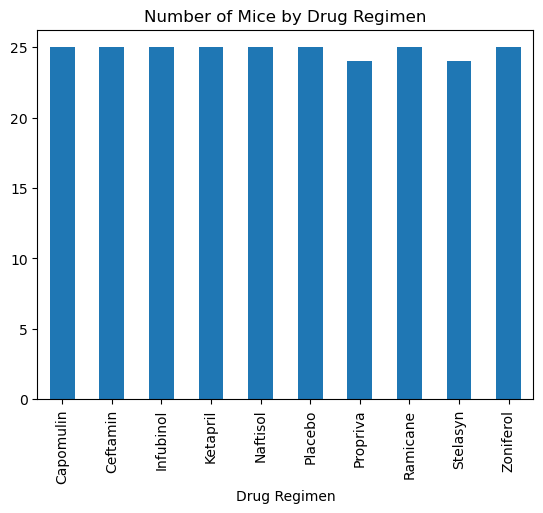

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_metadata_clean.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index(name="Count of Mouse ID").plot.bar(x="Drug Regimen",y="Count of Mouse ID",legend=False,title="Number of Mice by Drug Regimen")


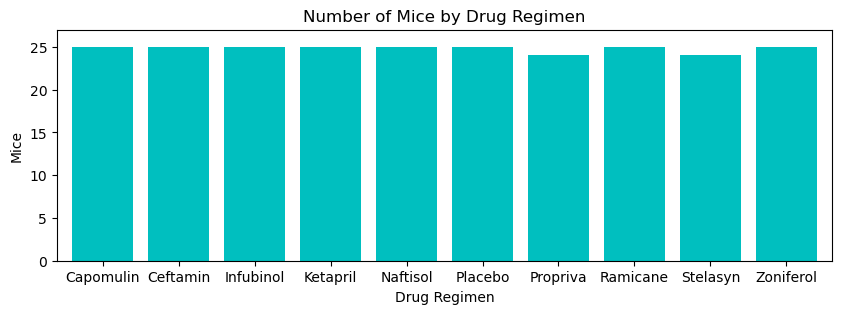

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barPlot=mouse_metadata_clean.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index(name="Count of Mouse ID")
bars=barPlot["Count of Mouse ID"]
x_axis=np.arange(len(bars))
Regimens=barPlot["Drug Regimen"]
plt.figure(figsize=(10,3))
plt.bar(x_axis,bars,color="c")
tick_locations=[x for x in x_axis]
plt.xticks(tick_locations,Regimens)
plt.xlim(-.6,9.6)
plt.ylim(0,27)
plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

<Axes: title={'center': 'Distribution of Gender in Test'}>

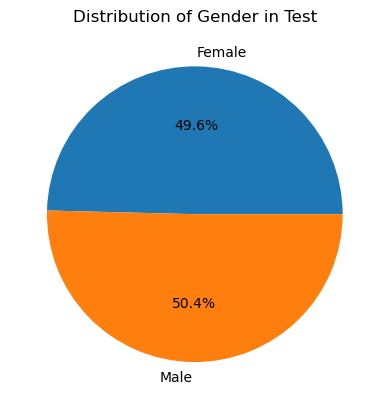

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata_clean.groupby(["Sex"])["Mouse ID"].count().plot.pie(title="Distribution of Gender in Test",label="",autopct="%1.1f%%")


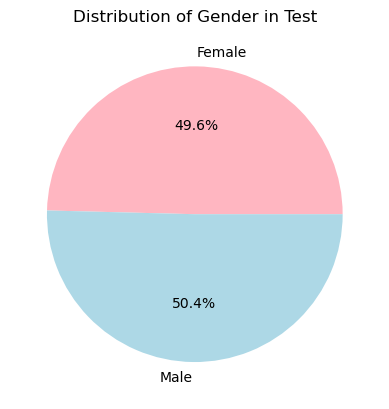

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piePlot=mouse_metadata_clean.groupby(["Sex"])["Mouse ID"].count().reset_index(name="Count of Mouse ID")
labs = piePlot["Sex"]
Count = piePlot["Count of Mouse ID"]
colors = ["lightpink","lightblue"]
plt.pie(Count, labels=labs, colors=colors,autopct="%1.1f%%")
plt.title("Distribution of Gender in Test")

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Top4=combined_clean.loc[(combined_clean["Drug Regimen"]=="Capomulin")|(combined_clean["Drug Regimen"]=="Ramicane")|(combined_clean["Drug Regimen"]=="Infubinol")|(combined_clean["Drug Regimen"]=="Ceftamin") ,:]
# Start by getting the last (greatest) timepoint for each mouse
Top4=Top4.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Top4=pd.merge(Top4,combined_clean[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
Top4

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=Top4.iloc[i,:]["Drug Regimen"]
    Tum=Top4.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = Top4.loc[Top4["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for Tumor in Tumors[Num]:
    if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")
    
    
    
    


The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values abo

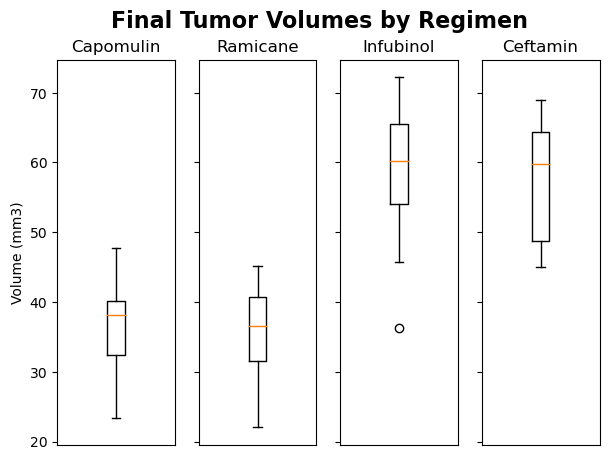

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(7,5))
fig.suptitle("Final Tumor Volumes by Regimen", fontsize=16, fontweight="bold")

ax1.set_ylabel('Volume (mm3)')
ax1.set_title(Treatments[0])
ax1.boxplot(Tumors[0])
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(Tumors[1])
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(Tumors[2])
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(Tumors[3])
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

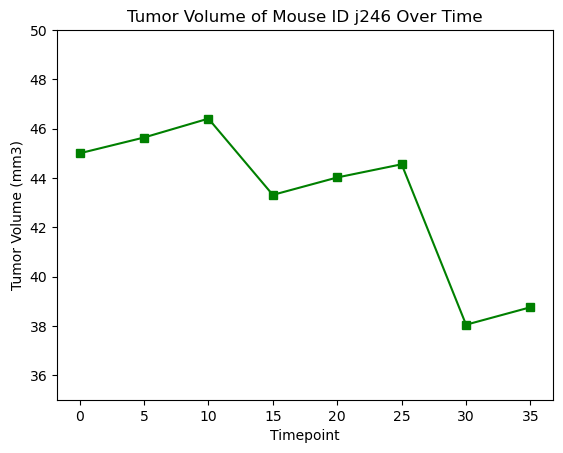

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Single_Mouse=combined_clean.loc[combined_clean["Mouse ID"]=='j246',:]
x_axis=Single_Mouse["Timepoint"].count()
plt.plot(Single_Mouse["Timepoint"],Single_Mouse["Tumor Volume (mm3)"],marker='s',color="g")
plt.title("Tumor Volume of Mouse ID j246 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(35,50)
plt.show()

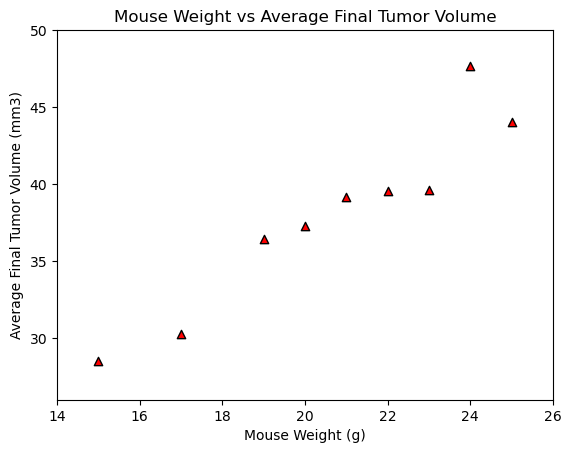

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Weight_df=combined_clean.loc[combined_clean["Drug Regimen"]=="Capomulin",:]
# Reduce to final timepoint per mouse
Weight_df=Weight_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Weight_df=pd.merge(Weight_df,combined_clean[["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]],on=["Mouse ID","Timepoint"],how="left")
Weight_df=Weight_df.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index(name="Average Tumor Volume")
#Weight_df.head()
plt.scatter(Weight_df["Weight (g)"], Weight_df["Average Tumor Volume"], marker="^", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs Average Final Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.show()

## Correlation and Regression

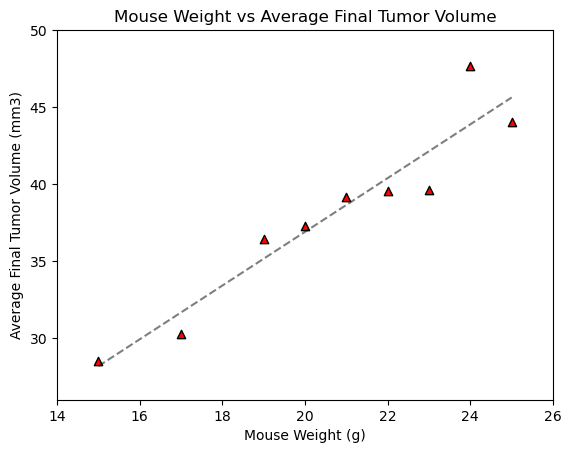

The correlation coefficient between weight and average final tumor volume is 0.95


In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(Weight_df["Weight (g)"], Weight_df["Average Tumor Volume"])
m_fit = m_slope * Weight_df["Weight (g)"] + m_int
plt.scatter(Weight_df["Weight (g)"], Weight_df["Average Tumor Volume"], marker="^", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs Average Final Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.plot(Weight_df["Weight (g)"],m_fit,"--",color="black",alpha=.5)
plt.show()

#Correlation Coefficient
W=Weight_df["Weight (g)"]
A=Weight_df["Average Tumor Volume"]
print(f"The correlation coefficient between weight and average final tumor volume is {round(st.pearsonr(W,A)[0],2)}")
